# Convolutions

In this lab, we'll look in detail at convolutions and how they can be used to process images.

### Reading and opening images

We'll use the `skimage` library to read and process images. It's a library dedicated to image processing, which is part of the `scikit-learn` family.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import skimage

sample image shape:  (400, 600, 3)


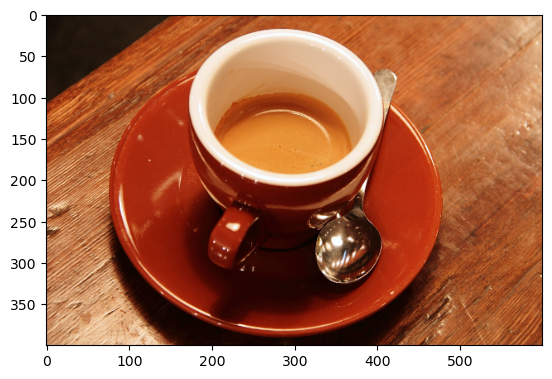

In [2]:
sample_image = skimage.data.coffee()

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));

### A simple convolution filter

Before we start working on training any models, let's look at applying a convolution filter to an image. We'll use the `Conv2D` layer from Keras to do this.

In [3]:
from tensorflow.keras.layers import Conv2D

In [4]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
              input_shape=(None, None, 3))

Remember: in Keras, `None` is used as a marker for tensor dimensions with dynamic size. In this case `batch_size`, `width` and `height` are all dynamic: they can depend on the input. This is a neat feature of convolutional neural networks: the same model can be used to process images of any size, because all we have to do is slide the convolutional filter across the image as much as necessary.

In [5]:
sample_image.shape

(400, 600, 3)

In [6]:
img_in = np.expand_dims(sample_image, 0).astype(float)
img_in.shape

(1, 400, 600, 3)

In [7]:
img_out = conv(img_in) # Apply the convolutional filter

The output is a tensorflow Eager Tensor - a special data structure that is used to represent the result of operations in TensorFlow. It is not a numpy array, but it can be converted to one using the `.numpy()` method:

In [8]:
np_img_out = img_out[0].numpy()
print(type(np_img_out))
print(np_img_out.shape)

<class 'numpy.ndarray'>
(400, 600, 3)


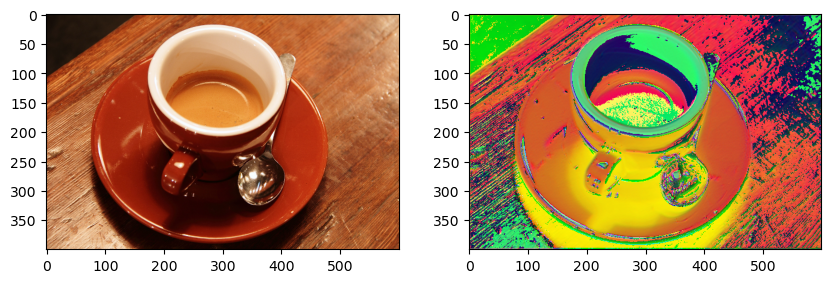

In [9]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(np_img_out.astype('uint8'));

As we can see, our convolutional filter was initialized randomly, so our output doesn't contain any specific meaning. Each pixel is a random combination of the pixels in the input image, in a 5x5 window.

Let's instead take a look at a convolutional feature with a clear purpose. We can build a kernel ourselves, by defining a function which will be passed to `Conv2D` Layer.
We'll create an array with 1/25 for filters, with each channel seperated. Before you move to the next cell, can you guess what this filter will do?

In [10]:
def my_kernel(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype="float32")
    array[:, :, 0, 0] = 1 / 25
    array[:, :, 1, 1] = 1 / 25
    array[:, :, 2, 2] = 1 / 25
    return array

Now we can use this function to initialize a `Conv2D` layer:

In [11]:
conv = Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_kernel)

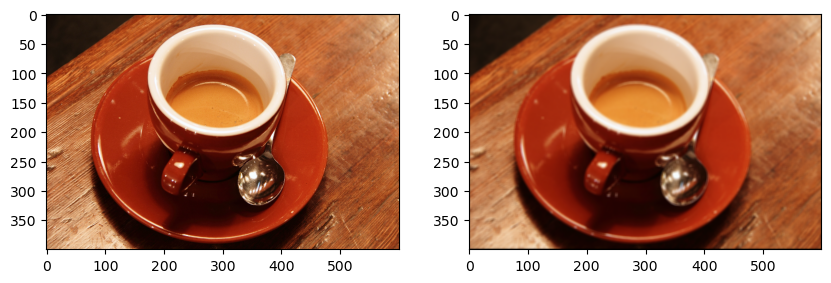

In [12]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));

The filter is a convolution filter. The resultant image is similar, but lacks resolution/definition. 

Hopefully you can tell what this filter does!

**Exercise**
- There are a number of settings when we define our Conv2D layer. Try changing the following parameters to get a sense of how they impact the result:
- kernel_size: try different sizes
- padding: try 'valid' instead of 'same' (hint: this may change the size of the output)

In [13]:
# Your code here - practice different changes of kernel
conv = Conv2D(filters=3, kernel_size=(2, 7), padding="valid",  # Practiced changing kernel_size to (2,5), (5,7) (2,7), padding "valid"
           input_shape=(None, None, 3), kernel_initializer=my_kernel)

(1, 399, 594, 3)


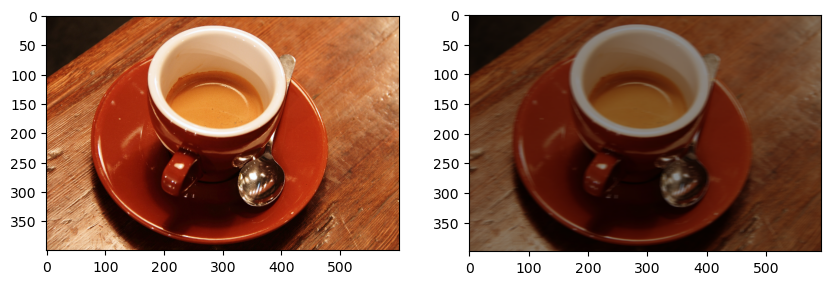

In [14]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))

img_out = conv(img_in)
np_img_out = img_out[0].numpy()
ax1.imshow(np_img_out.astype('uint8'));
print (img_out.shape)

### Working on edge detection on Grayscale image

Using a grayscale image, let's build an "edge detector" using a convolutional filter. Some filters pre-date the deep learning era and are still used today. For example, the Sobel filter is used to detect edges in images. These easy-to-compute filters were used in the early days of computer vision and are still useful now.

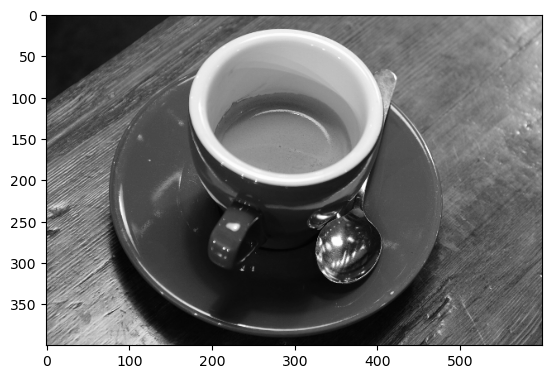

In [15]:
# convert image to greyscale
grey_sample_image = sample_image.mean(axis=2)

# add the channel dimension even if it's only one channel so
# to be consistent with Keras expectations.
grey_sample_image = grey_sample_image[:, :, np.newaxis]

# matplotlib does not like the extra dim for the color channel
# when plotting gray-level images. Let's use squeeze:
plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray);

**Exercise**
- Build an edge detector using `Conv2D` on greyscale image by defining the kernel inside `my_kernel`.
- You may experiment with several kernels to find a way to detect edges. The following article contains specific examples of kernels that you can use:
- https://en.wikipedia.org/wiki/Kernel_(image_processing)
- Try different kernels and see the impact on the output.

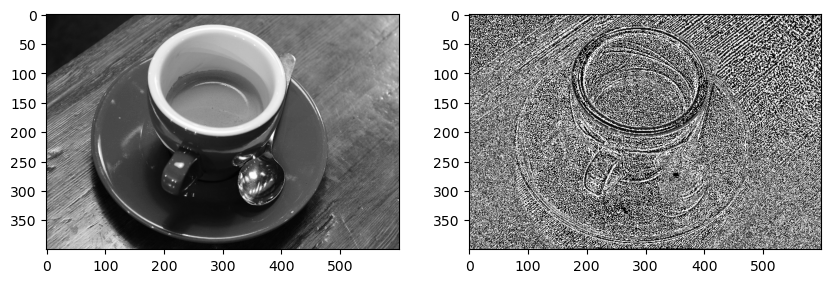

In [16]:
# MK notes - check out the webside for some of the standardized kernes for this application - edge detection
# MK try different kernels
def my_kernel(shape=(3, 3, 1, 1), dtype=None):
    array = np.array([[-1, -1, -1],
                      [-1,  8, -1],
                      [-1, -1, -1]])
    array = array.reshape(*shape)
    return array

conv = Conv2D(filters=1, kernel_size=(3, 3), padding="same",
              input_shape=(None, None, 1), kernel_initializer=my_kernel)

img_in = np.expand_dims(grey_sample_image, 0) # Reshape into a batch of size 1
img_out = conv(img_in) # Apply the convolutional filter
np_img_out = img_out[0].numpy() # Convert to numpy array

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray)
ax1.imshow(np_img_out.astype(np.uint8), cmap=plt.cm.gray);


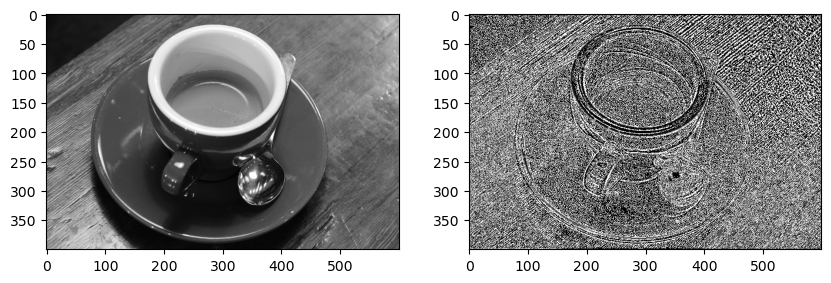

In [17]:
# MK Practicing and trying different parameters 
def my_kernel(shape=(3, 3, 1, 1), dtype=None):
    array = np.array([[0, -1, 0],
                      [-1,  4, -1],
                      [0, -1, 0]])
    array = array.reshape(*shape)
    return array

conv = Conv2D(filters=1, kernel_size=(3, 3), padding="same",
              input_shape=(None, None, 1), kernel_initializer=my_kernel)

img_in = np.expand_dims(grey_sample_image, 0) # Reshape into a batch of size 1
img_out = conv(img_in) # Apply the convolutional filter
np_img_out = img_out[0].numpy() # Convert to numpy array

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray)
ax1.imshow(np_img_out.astype(np.uint8), cmap=plt.cm.gray);


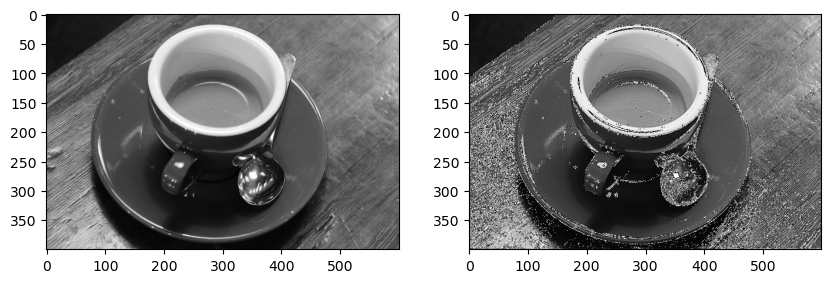

In [18]:
# MK Practicing and trying different parameters 
def my_kernel(shape=(3, 3, 1, 1), dtype=None):
    array = np.array([[0, -1, 0],
                      [-1,  5, -1],
                      [0, -1, 0]])
    array = array.reshape(*shape)
    return array

conv = Conv2D(filters=1, kernel_size=(3, 3), padding="same",
              input_shape=(None, None, 1), kernel_initializer=my_kernel)

img_in = np.expand_dims(grey_sample_image, 0) # Reshape into a batch of size 1
img_out = conv(img_in) # Apply the convolutional filter
np_img_out = img_out[0].numpy() # Convert to numpy array

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
           cmap=plt.cm.gray)
ax1.imshow(np_img_out.astype(np.uint8), cmap=plt.cm.gray);


### Pooling and strides with convolutions

**Exercise**
- Use `MaxPool2D` to apply a 2x2 max pool with strides 2 to the image. What is the impact on the shape of the image?
- Use `AvgPool2D` to apply an average pooling.
- Is it possible to compute a max pooling and an average pooling with well chosen kernels?

(200, 300, 1)


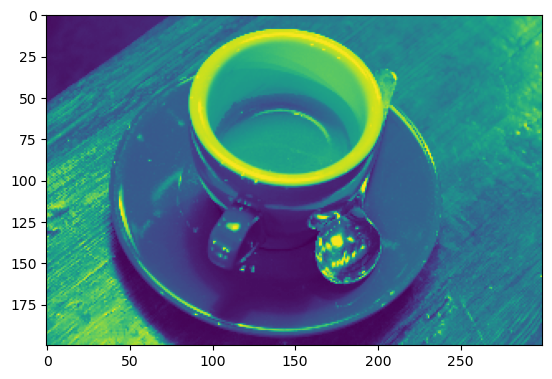

In [19]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

# You can use `img_in` from above as input to the pooling layers

pool = MaxPool2D(pool_size=(2, 2), strides=2, padding="valid")
img_out = pool(img_in)
# see video

np_img_out = img_out[0].numpy()
print(np_img_out.shape)
plt.imshow(np_img_out.astype('uint8'))


#Conversion into grey scale
#plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
#           cmap=plt.cm.gray);

# Your code here

(200, 300, 1)


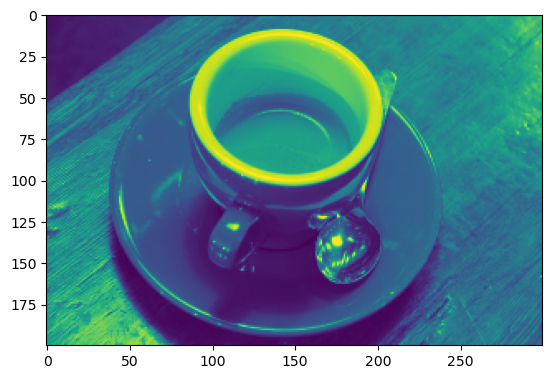

In [20]:
#Testing AvgPool2D

from tensorflow.keras.layers import MaxPool2D, AvgPool2D

# You can use `img_in` from above as input to the pooling layers

pool = AvgPool2D(pool_size=(2, 2), strides=2, padding="valid")
img_out = pool(img_in)
# see video

np_img_out = img_out[0].numpy()
print(np_img_out.shape)
plt.imshow(np_img_out.astype('uint8'))


#Conversion into grey scale
#plt.imshow(np.squeeze(grey_sample_image.astype(np.uint8)),
#           cmap=plt.cm.gray);

# Your code here

Answer: The difference is sharpness, less in the case od AvgPool 2D.

## Loading a JPEG file as a numpy array

Let's use [scikit-image](http://scikit-image.rg) to load the content of a JPEG file into a numpy array:

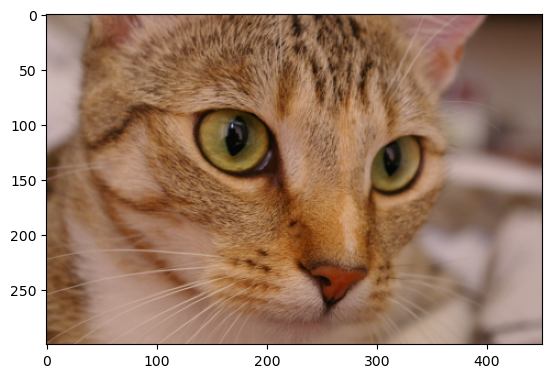

In [21]:
from skimage.io import imread

image = skimage.data.cat()
plt.imshow(image);

## Resizing images, handling data types and dynamic ranges

While convolutions can handle inputs of any size, it is often useful to resize images to a fixed size. This is particularly important for training deep learning models:

- for **image classification**, most networks expect a specific **fixed input size**;

- for **object detection** and instance segmentation, networks have more flexibility but the image should have **approximately the same size as the training set images**.

Furthermore **large images can be much slower to process** than smaller images (the number of pixels varies quadratically with the height and width).

In [22]:
from skimage.transform import resize

lowres_image = resize(image, (50, 50), mode='reflect', anti_aliasing=True)
lowres_image.shape

(50, 50, 3)

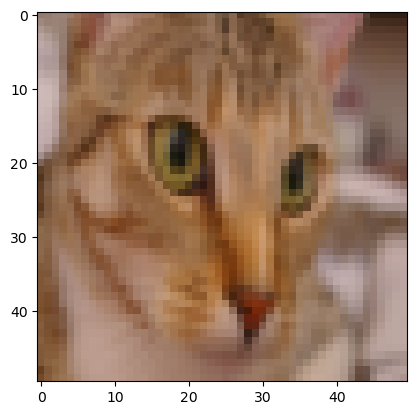

In [23]:
plt.imshow(lowres_image, interpolation='nearest');

The values of the pixels of the low resolution image are computed from by combining the values of the pixels in the high resolution image. The result is therefore represented as floating points.

## Using a pretrained model

Objectives:

- Load a pre-trained ResNet50 pre-trained model using Keras Zoo
- Use the model to classify an image
- Use the model to classify an image from the webcam

Let's start with loading ResNet50, a well-established method for image classification. The ResNet50 "application" takes two key parameters here: firstly, `include_top` indicates whether we want to include the last layer of the network (the classification layer) or not. Secondly, `weights` indicates whether we want to load the weights of a model that has been pre-trained on ImageNet or not.

In [24]:
from tensorflow.keras.applications.resnet50 import ResNet50

model = ResNet50(include_top=True, weights='imagenet')
model.compile(optimizer='sgd', loss='categorical_crossentropy')

In [25]:
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

### Classification of an image

**Exercise**
- Reshape the `laptop` image to the shape `(224, 224, 3)` using `resize` from `skimage.transform`
- Use `preprocess_input` from `tensorflow.keras.applications.imagenet_utils` to preprocess the image
- Use `predict` to classify the image

Documentation for each method:
- [resize](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize)
- [preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/preprocess_input)
- [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict)

In [26]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
image = skimage.data.cat()
print(image)
image_resized = resize(image, (224, 224), anti_aliasing=True) * 256
image_resized = np.expand_dims(image_resized, 0)
image_resized = preprocess_input(image_resized)

print(image_resized)

preds = model.predict(image_resized)
print('Predicted', decode_predictions(preds, top=3)[0])

# Your code here


[[[143 120 104]
  [143 120 104]
  [141 118 102]
  ...
  [ 45  27  13]
  [ 45  27  13]
  [ 45  27  13]]

 [[146 123 107]
  [145 122 106]
  [143 120 104]
  ...
  [ 46  29  13]
  [ 45  29  13]
  [ 47  30  14]]

 [[148 126 112]
  [147 125 111]
  [146 122 109]
  ...
  [ 48  28  17]
  [ 49  29  18]
  [ 50  30  19]]

 ...

 [[ 92  58  30]
  [105  71  43]
  [132  98  71]
  ...
  [172 145 138]
  [172 145 138]
  [172 145 138]]

 [[128  92  60]
  [139 103  71]
  [134  95  64]
  ...
  [166 142 132]
  [166 142 132]
  [167 143 133]]

 [[139 103  71]
  [127  88  57]
  [125  86  53]
  ...
  [161 137 127]
  [161 137 127]
  [162 138 128]]]
[[[[  0.77053231   3.9932774   20.18247348]
   [ -1.1786605    2.04408458  18.23328067]
   [ -1.36838003   1.85436507  18.04356115]
   ...
   [-88.71889292 -89.55489137 -75.45330599]
   [-89.84283026 -88.90298298 -75.98855642]
   [-90.81279708 -89.25747028 -78.34335179]]

  [[  5.35883674   7.53077645  23.26696143]
   [  2.55413447   4.36036747  20.97613795]
   [  0.7

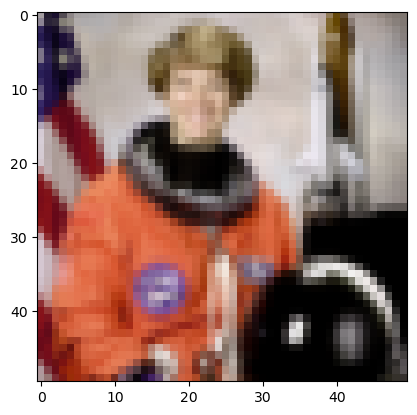

In [27]:
from skimage.io import imread
from tensorflow.keras.layers import Conv2D
image = skimage.data.astronaut()
plt.imshow(image);


from skimage.transform import resize

lowres_image = resize(image, (50, 50), mode='reflect', anti_aliasing=True)
lowres_image.shape

plt.imshow(lowres_image, interpolation='nearest');


In [28]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
image = skimage.data.astronaut()
print(image)
image_resized = resize(image, (224, 224), anti_aliasing=True) * 256
image_resized = np.expand_dims(image_resized, 0)
image_resized = preprocess_input(image_resized)

print(image_resized)

preds = model.predict(image_resized)
print('Predicted', decode_predictions(preds, top=3)[0])


[[[154 147 151]
  [109 103 124]
  [ 63  58 102]
  ...
  [127 120 115]
  [120 117 106]
  [125 119 110]]

 [[177 171 171]
  [144 141 143]
  [113 114 124]
  ...
  [127 118 112]
  [124 115 108]
  [121 116 105]]

 [[201 194 193]
  [182 178 175]
  [168 165 164]
  ...
  [128 120 117]
  [126 116 112]
  [124 114 109]]

 ...

 [[186 170 176]
  [186 170 177]
  [183 168 170]
  ...
  [  0   0   0]
  [  0   0   1]
  [  0   0   0]]

 [[183 169 170]
  [182 167 171]
  [185 164 176]
  ...
  [  0   0   1]
  [  1   1   1]
  [  0   0   0]]

 [[184 167 172]
  [183 165 169]
  [180 162 171]
  ...
  [  0   0   0]
  [  1   1   1]
  [  0   0   0]]]
[[[[  43.85917046   23.83665471   21.56793049]
   [  16.80987517  -16.06862187  -22.05421333]
   [  32.26518255   19.79291943   15.87915813]
   ...
   [   9.67541393    2.99583555    3.55981579]
   [   8.60469744    2.27737059    2.60404791]
   [   4.81942311    0.2092528     0.17081417]]

  [[  98.19998216   87.09128945   86.79697371]
   [  84.85938957   71.972046   

##  Taking snapshots from the webcam

For this section, we will take an image from your laptop webcam and classify it. If you feel uncomfortable doing this section, you can skip it and use a photo of your choice from the web instead.

In [29]:
import cv2

def camera_grab(camera_id=0, fallback_filename=None):
    camera = cv2.VideoCapture(camera_id)
    try:
        # take 10 consecutive snapshots to let the camera automatically tune
        # itself and hope that the contrast and lighting of the last snapshot
        # is good enough.
        for i in range(10):
            snapshot_ok, image = camera.read()
        if snapshot_ok:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        else:
            print("WARNING: could not access camera")
            if fallback_filename:
                image = imread(fallback_filename)
    finally:
        camera.release()
    return image

dtype: uint8, shape: (480, 640, 3), range: (106, 255)


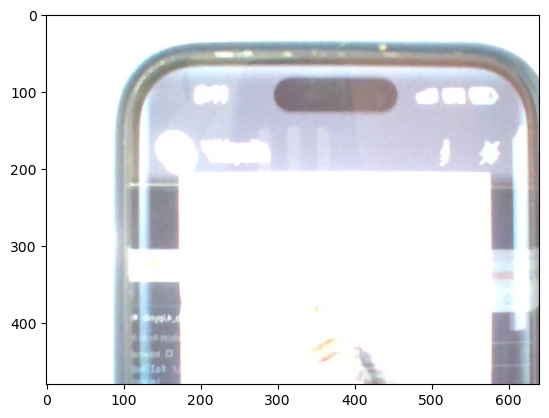

In [31]:
image = camera_grab(camera_id=0, fallback_filename='laptop.jpeg')
plt.imshow(image)
print("dtype: {}, shape: {}, range: {}".format(
    image.dtype, image.shape, (image.min(), image.max())))


### Exercise

Apply the same preprocessing as before and classify the image. What are your results?

dtype: uint8, shape: (480, 640, 3), range: (0, 11)


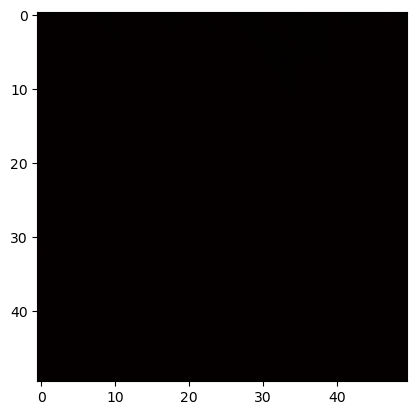

In [35]:
from skimage.io import imread
from tensorflow.keras.layers import Conv2D
image = skimage.data.astronaut()

image = camera_grab(camera_id=0, fallback_filename='laptop.jpeg')
plt.imshow(image);
print("dtype: {}, shape: {}, range: {}".format(
    image.dtype, image.shape, (image.min(), image.max())))

from skimage.transform import resize

lowres_image = resize(image, (50, 50), mode='reflect', anti_aliasing=True)
lowres_image.shape

plt.imshow(lowres_image, interpolation='nearest');


In [36]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

image_resized = resize(image, (224, 224), anti_aliasing=True) * 256
image_resized = np.expand_dims(image_resized, 0)
image_resized = preprocess_input(image_resized)

print(image_resized)

preds = model.predict(image_resized)
print('Predicted', decode_predictions(preds, top=3)[0])

[[[[-103.89925115 -116.779      -118.62064331]
   [-103.65305916 -116.77712525 -118.37445132]
   [-102.84064837 -116.24505944 -117.56512295]
   ...
   [-103.939      -116.779      -120.66823529]
   [-103.939      -116.779      -120.66823529]
   [-103.939      -116.779      -120.66823529]]

  [[-103.89925115 -116.779      -118.62064331]
   [-103.65305916 -116.77712525 -118.37445132]
   [-102.84064837 -116.24505944 -117.56512295]
   ...
   [-103.939      -116.779      -120.66823529]
   [-103.939      -116.779      -120.66823529]
   [-103.939      -116.779      -120.66823529]]

  [[-103.89925115 -116.779      -118.62064331]
   [-103.65305916 -116.77712525 -118.37445132]
   [-102.84064837 -116.24505944 -117.56512295]
   ...
   [-103.939      -116.779      -120.66823529]
   [-103.939      -116.779      -120.66823529]
   [-103.939      -116.779      -120.66823529]]

  ...

  [[-102.93660015 -116.779      -117.6579923 ]
   [-103.12106966 -116.779      -117.84246182]
   [-103.5998171  -116.779